# Color Identification in Images (Computer vision & IoT Task 2)

## READING LIBRARIES

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# IMPORTING IMAGE

The type of this input is <class 'numpy.ndarray'>
Shape: (400, 640, 3)


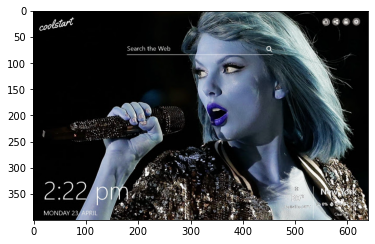

In [2]:
imgName = ('C:/Users/hp/Desktop/i.jpg')
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

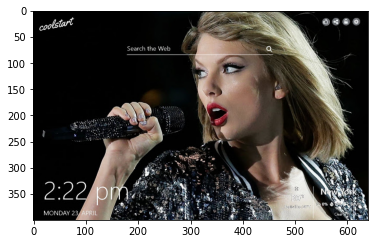

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

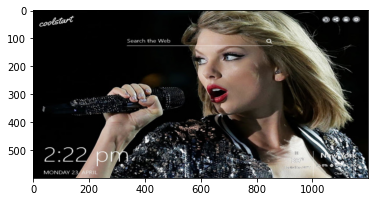

In [4]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# COLOR IDENTIFICATION
FIRST, WE WILL DEFINE A FUNCTION THAT CAN GIVE US THE HEX VALUES OF OUR THE COLORS THAT WE WILL IDENTIFY

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Clusters of colors are identified and arranged in the correct order.
So we plot the colors as a PIE CHART

In [6]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([1.59206552, 1.7961198 , 1.77767623]),
 array([162.80111507, 148.29266063, 134.3654145 ]),
 array([84.15053393, 77.05442646, 69.48587668]),
 array([233.07918033, 234.14803279, 229.40540984]),
 array([41.46616031, 36.63861386, 30.49620236]),
 array([145.41462666, 120.50218709, 102.83416468]),
 array([207.61720898, 204.37167736, 194.15066453]),
 array([109.0703415 , 114.09966592, 116.8043801 ]),
 array([64.08809479, 55.11439916, 45.70457224]),
 array([18.06142892, 17.18869177, 16.15622737]),
 array([117.05367505,  97.20174081,  81.11247582]),
 array([190.52202567, 175.58628165, 162.51292057])]

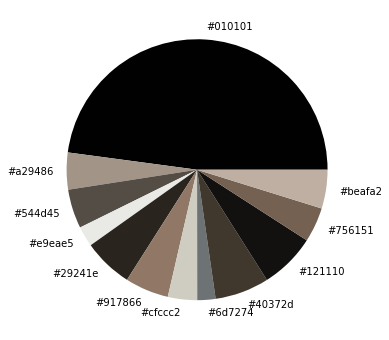

In [8]:
get_colors(get_image(imgName), 12, True)